In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [2]:
b_size = 5

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(150, 150),
    batch_size=b_size,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.


In [4]:
val_datagen = ImageDataGenerator(rescale=1./255) #원래 데이터가 들어와서 validation data가 되어야하므로 
val_generator = val_datagen.flow_from_directory(
    'data/test',
    target_size=(150, 150),
    batch_size=b_size,
    class_mode='binary'
)

Found 120 images belonging to 2 classes.


In [5]:
model = keras.Sequential()
model.add(keras.Input(shape=(150, 150, 3)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [7]:
history = model.fit(
       train_generator,
       epochs=20,
       validation_data=val_generator)

Epoch 1/20
32/32 [==============================] - 3s 96ms/step - loss: 0.7116 - accuracy: 0.5437 - val_loss: 0.6800 - val_accuracy: 0.5917
Epoch 2/20
32/32 [==============================] - 1s 38ms/step - loss: 0.6941 - accuracy: 0.5375 - val_loss: 0.6793 - val_accuracy: 0.5667
Epoch 3/20
32/32 [==============================] - 1s 43ms/step - loss: 0.6750 - accuracy: 0.5625 - val_loss: 0.6693 - val_accuracy: 0.5167
Epoch 4/20
32/32 [==============================] - 1s 46ms/step - loss: 0.6670 - accuracy: 0.5875 - val_loss: 0.6374 - val_accuracy: 0.7417
Epoch 5/20
32/32 [==============================] - 1s 38ms/step - loss: 0.6311 - accuracy: 0.6875 - val_loss: 0.6062 - val_accuracy: 0.6333
Epoch 6/20
32/32 [==============================] - 1s 37ms/step - loss: 0.6502 - accuracy: 0.6375 - val_loss: 0.6340 - val_accuracy: 0.5500
Epoch 7/20
32/32 [==============================] - 1s 38ms/step - loss: 0.5672 - accuracy: 0.7312 - val_loss: 0.4819 - val_accuracy: 0.8583
Epoch 8/20
32

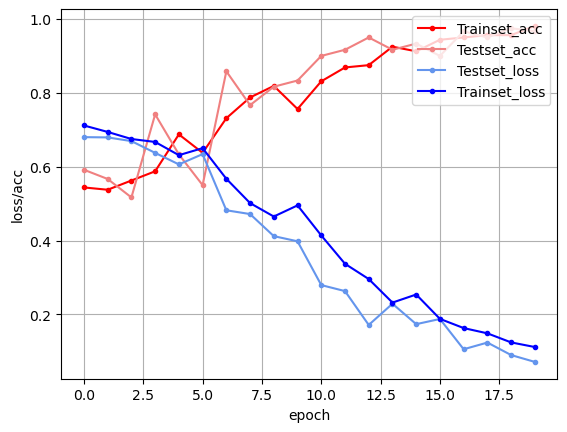

In [9]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()